In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD




/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006


In [2]:
# MNiST 데이터 읽기=============
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수 줄임
x_train = x_train[:300]
t_train = t_train[:300]


In [3]:
# weight decay(가중치 감쇠) 설정 ==========
# weight_decay_lambda = 0 # wight_decay를 사용하지 않는 경우
weight_decay_lambda = 0.13

In [4]:
network = MultiLayerNetExtend(
    input_size=784, 
    hidden_size_list=[100, 100, 100, 100], 
    output_size=10,
    # 가중치에 페널티를 부여하는 옵션
    weight_decay_lambda = weight_decay_lambda
)
optimizer = SGD(lr = 0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []


In [5]:
iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(5000000000):

    # 미니 배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    # 선택된 데이터(batch_mask)의 데이터와 레이블(정담)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산, 가중치 업데이트
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.08, test acc:0.1078
epoch:1, train acc:0.09333333333333334, test acc:0.118
epoch:2, train acc:0.12, test acc:0.1367
epoch:3, train acc:0.16333333333333333, test acc:0.1632
epoch:4, train acc:0.21333333333333335, test acc:0.1974
epoch:5, train acc:0.25666666666666665, test acc:0.2303
epoch:6, train acc:0.31, test acc:0.2651
epoch:7, train acc:0.34, test acc:0.2856
epoch:8, train acc:0.37666666666666665, test acc:0.3052
epoch:9, train acc:0.41333333333333333, test acc:0.3279
epoch:10, train acc:0.43666666666666665, test acc:0.3465
epoch:11, train acc:0.4666666666666667, test acc:0.3613
epoch:12, train acc:0.4666666666666667, test acc:0.3645
epoch:13, train acc:0.49666666666666665, test acc:0.3746
epoch:14, train acc:0.5133333333333333, test acc:0.3814
epoch:15, train acc:0.5066666666666667, test acc:0.3857
epoch:16, train acc:0.5333333333333333, test acc:0.4093
epoch:17, train acc:0.54, test acc:0.424
epoch:18, train acc:0.55, test acc:0.4366
epoch:19, train acc:0.58

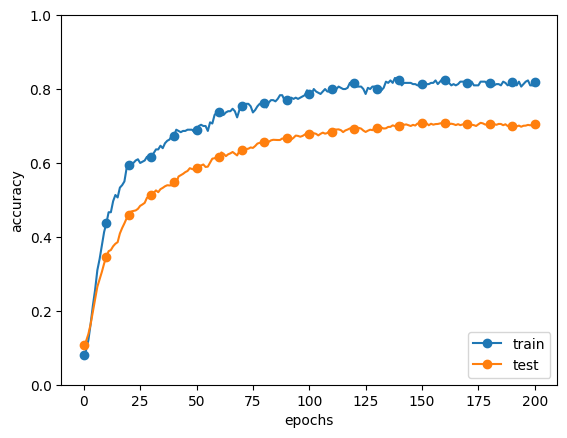

In [6]:
# 그래프 그리기 ==================
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='o', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()